# Assignment 4 Isolation Forests

### David Nicolay 26296918

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import json
from time import time
import warnings
warnings.filterwarnings('ignore')

# import my utils
import sys
sys.path.append('../')
from src.plots import (plot_f1_vs_param_size, plot_training_time_vs_param_size,
                       plot_convergence_curve, plot_stability_analysis, 
                       plot_performance_vs_time, create_summary_table,
                       analyze_plateau_point, find_sweet_spot,
                       plot_training_time_scaling, plot_precision_recall_tradeoff,
                       plot_bootstrap_stability_box_violin, plot_radar_chart_bootstrap,
                       plot_bootstrap_contamination_interaction)
from src.modelling import evaluate_isolation_forest, evaluate_isolation_forest_with_std
from src.multi_plots import (plot_multi_dataset_convergence, plot_multi_dataset_single_metric, plot_multi_dataset_stability,
                             plot_multi_dataset_pr_tradeoff, plot_multi_dataset_efficiency,
                             plot_parameter_sensitivity_heatmap, plot_multi_dataset_improvement,
                             plot_statistical_comparison, plot_pareto_front_3d)

ImportError: cannot import name 'plot_multi_dataset_training_time' from 'src.multi_plots' (/home/davidnicolay/Documents/ml441/ml441_assignments/assign4/notebooks/../src/multi_plots.py)

## 1. F1 plots

### 1.1 n_estimators


Plot saved to ../results/multi_dataset/n_estimators_convergence.pdf


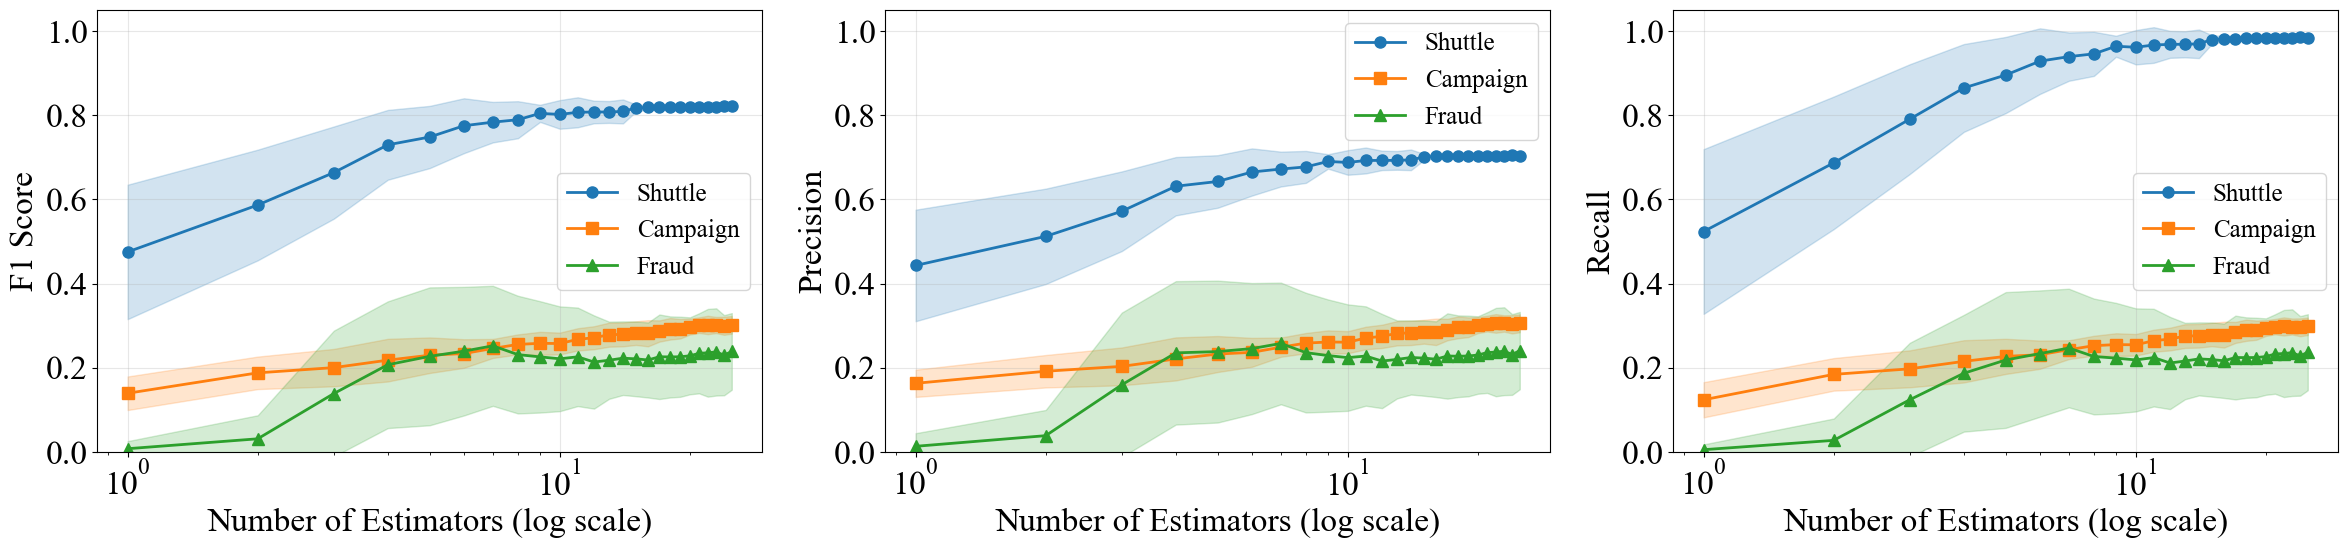

In [11]:
# Plot convergence curves for n_estimators across all datasets
plot_multi_dataset_convergence(
    param_name='n_estimators',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/n_estimators_convergence.pdf'
)

Plot saved to ../results/multi_dataset/n_estimators_f1.pdf


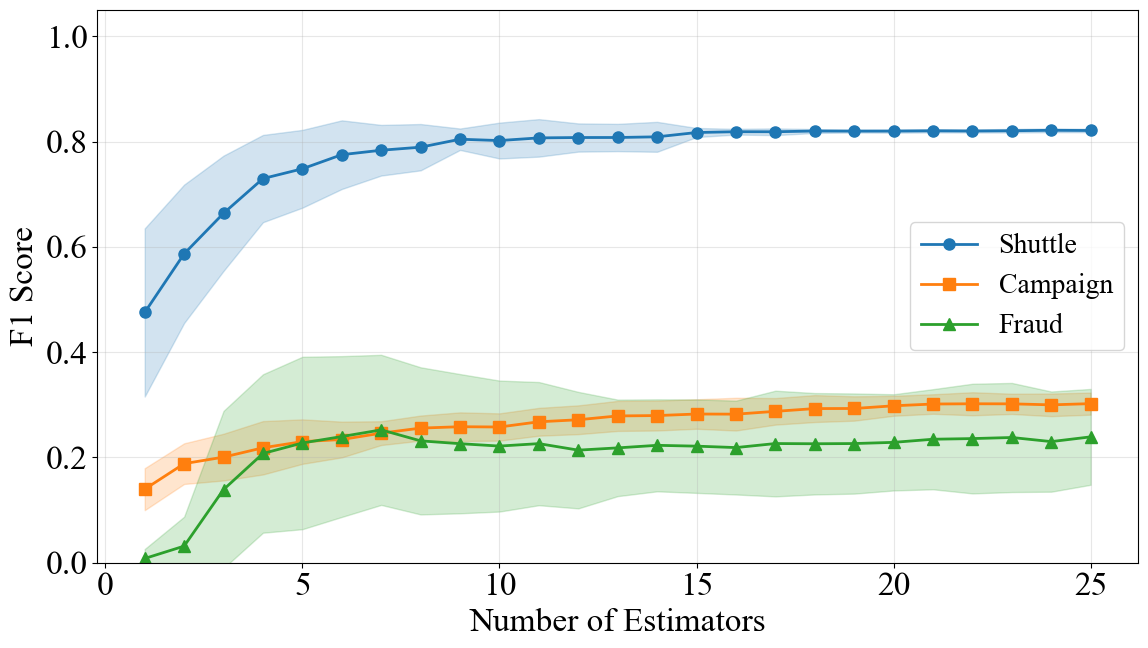

In [13]:
# Plot F1 score only for n_estimators
plot_multi_dataset_single_metric(
    param_name='n_estimators',
    metric='f1_score',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/n_estimators_f1.pdf'
)

### 1.2 max_samples

Plot saved to ../results/multi_dataset/max_samples_convergence.pdf


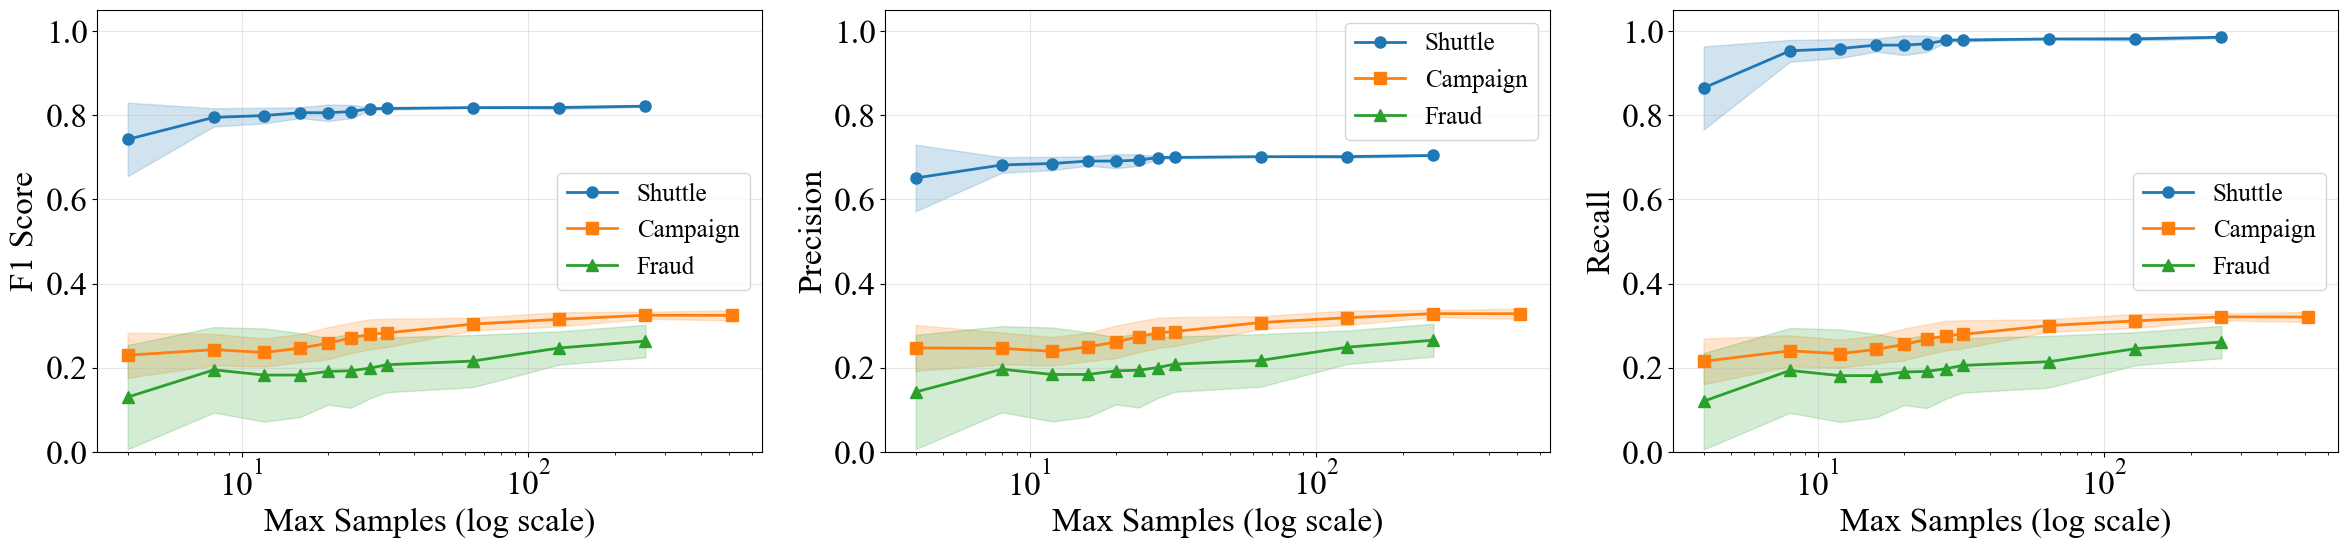

In [14]:
# Plot convergence curves for max_samples across all datasets
plot_multi_dataset_convergence(
    param_name='max_samples',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/max_samples_convergence.pdf'
)

Plot saved to ../results/multi_dataset/max_samples_f1.pdf


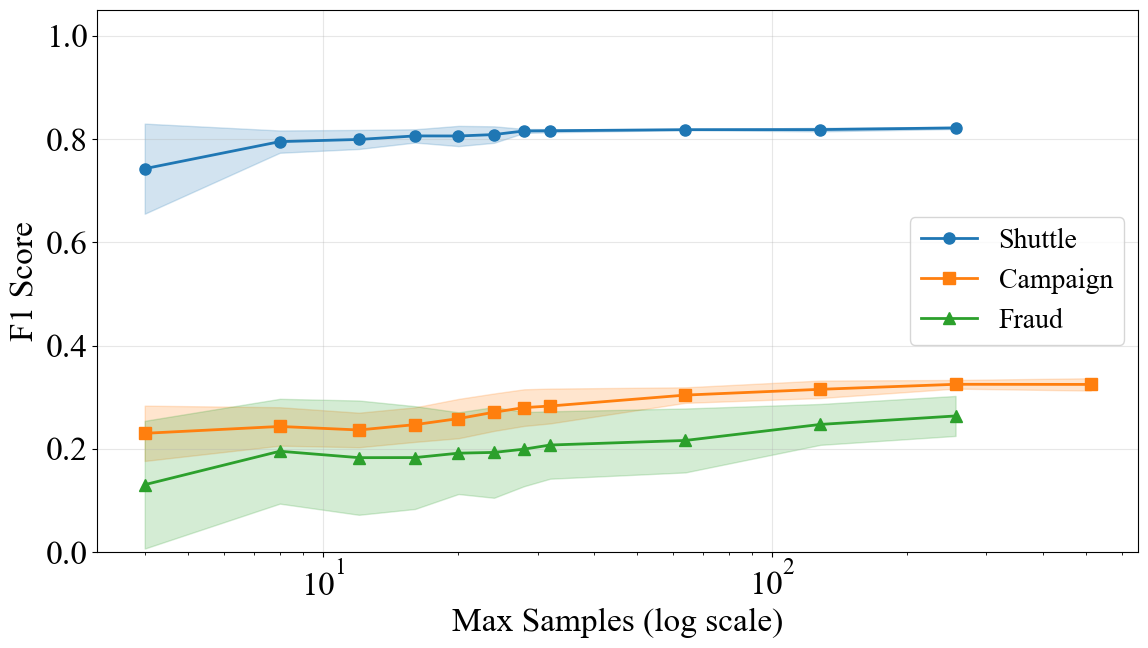

In [15]:
# Plot F1 score only for max_samples
plot_multi_dataset_single_metric(
    param_name='max_samples',
    metric='f1_score',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/max_samples_f1.pdf'
)

### 1.3 contamination

Plot saved to ../results/multi_dataset/contamination_convergence.pdf


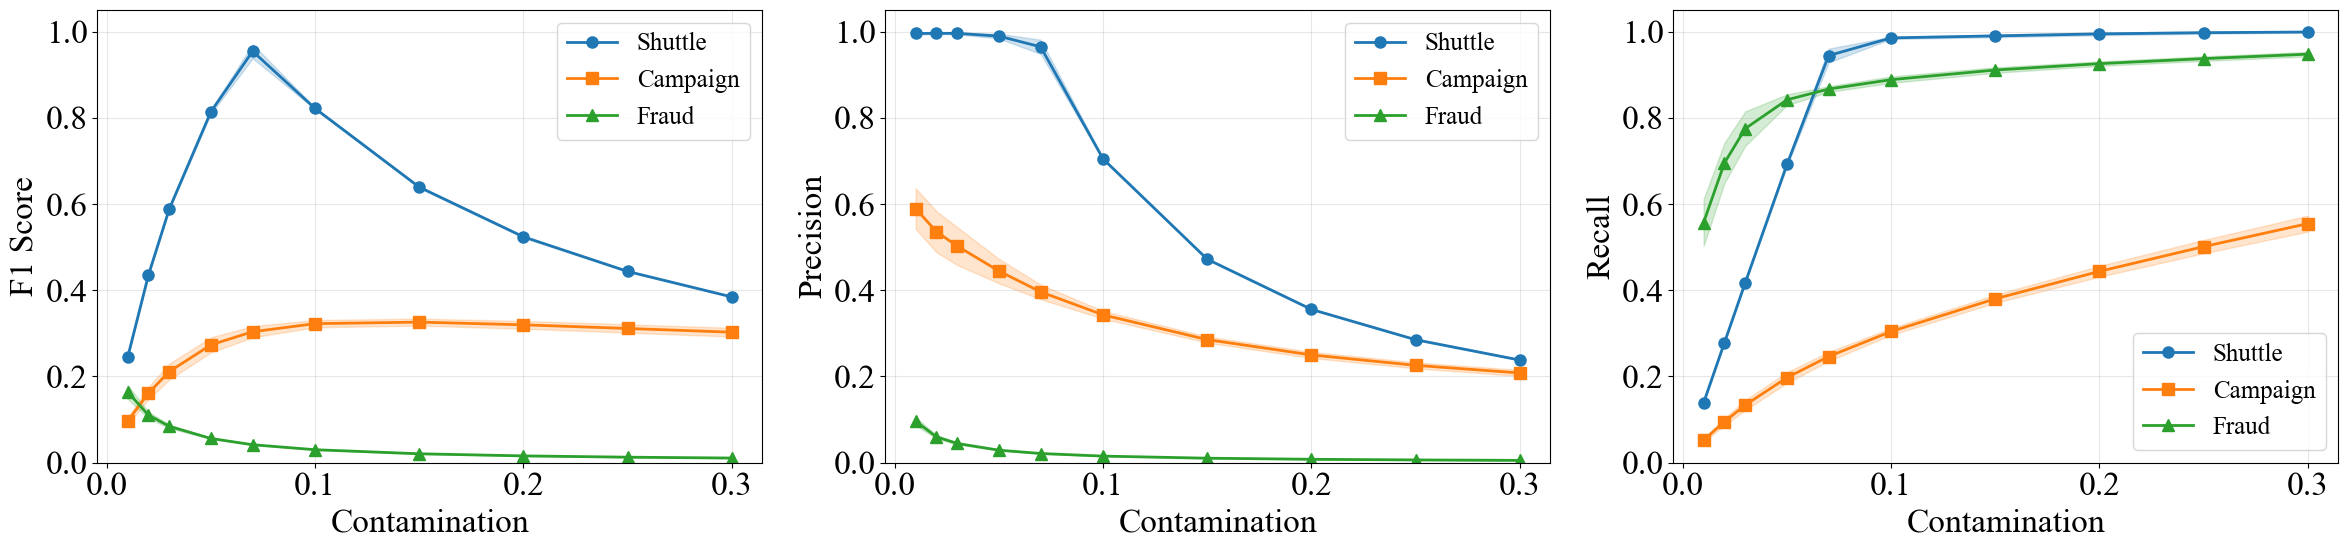

In [16]:
# Plot convergence curves for contamination across all datasets
plot_multi_dataset_convergence(
    param_name='contamination',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/contamination_convergence.pdf'
)

Plot saved to ../results/multi_dataset/contamination_f1.pdf


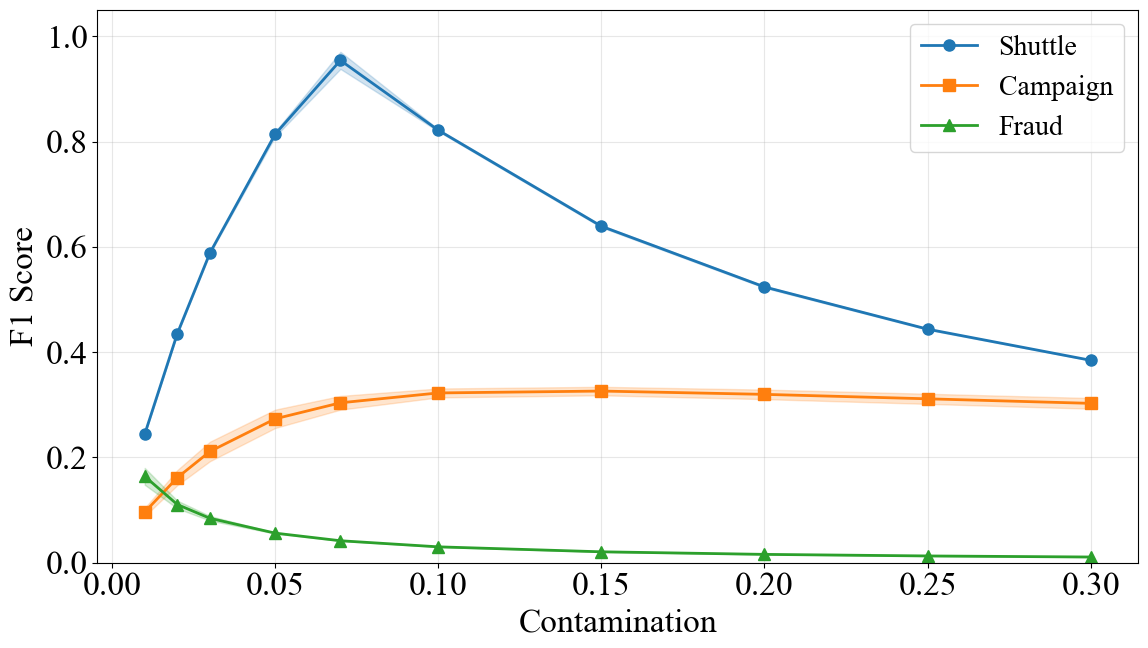

In [17]:
# Plot F1 score only for contamination
plot_multi_dataset_single_metric(
    param_name='contamination',
    metric='f1_score',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/contamination_f1.pdf'
)

### 1.4 max_features

Plot saved to ../results/multi_dataset/max_features_convergence.pdf


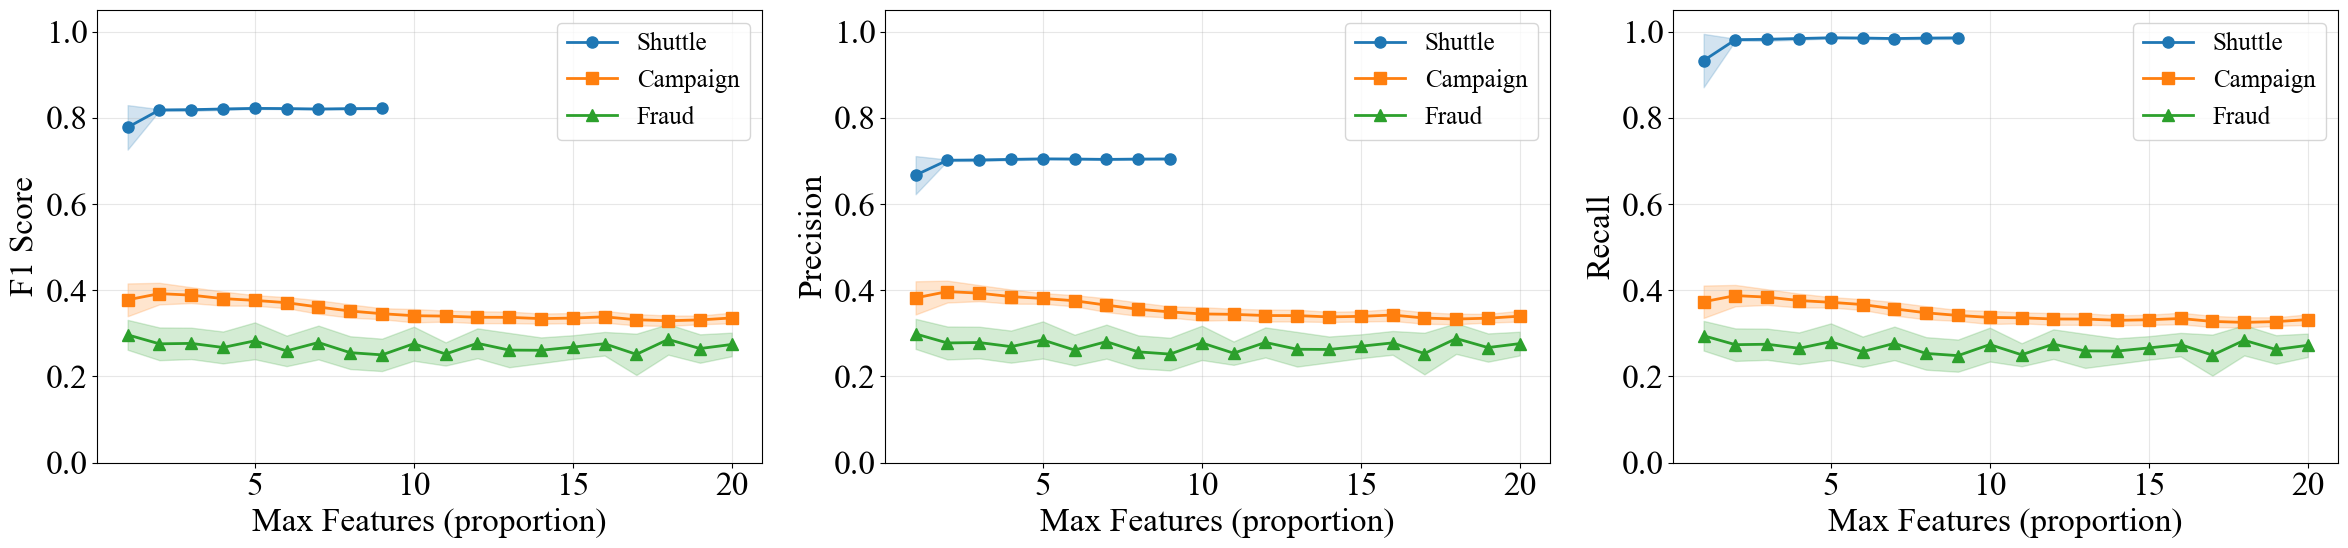

In [18]:
# Plot convergence curves for max_features across all datasets
plot_multi_dataset_convergence(
    param_name='max_features',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/max_features_convergence.pdf'
)

Plot saved to ../results/multi_dataset/max_features_f1.pdf


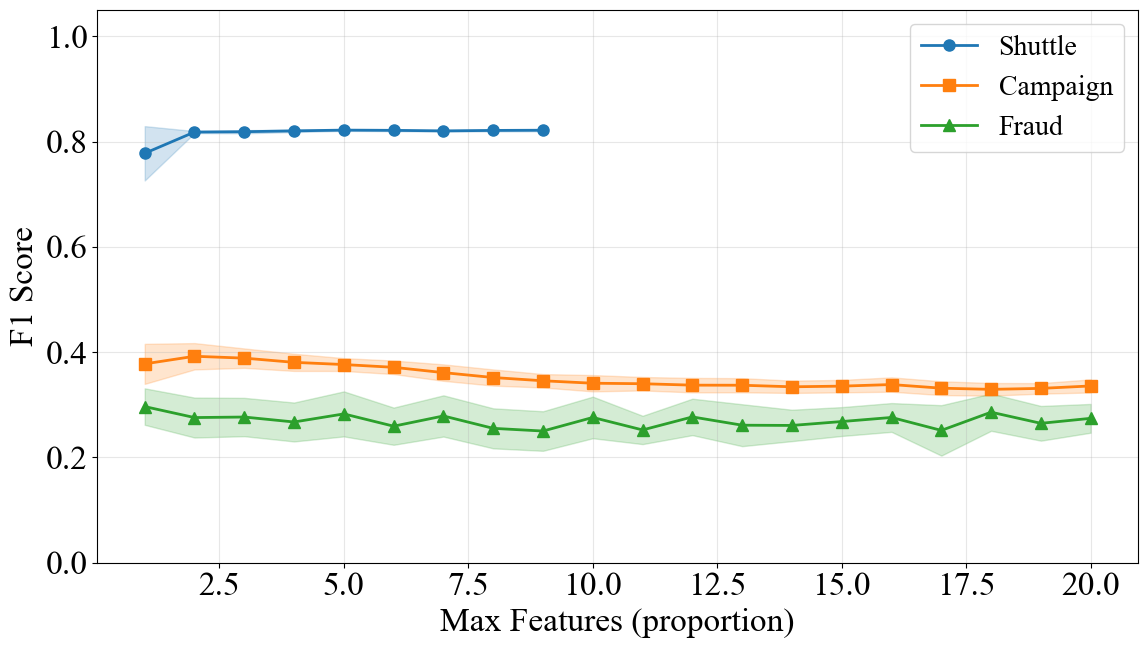

In [19]:
# Plot F1 score only for max_features
plot_multi_dataset_single_metric(
    param_name='max_features',
    metric='f1_score',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/max_features_f1.pdf'
)

## Summary

This notebook provides comprehensive multi-dataset comparison analysis for Isolation Forest across three datasets (Shuttle, Campaign, and Fraud) for four key hyperparameters:

1. **n_estimators**: Number of trees in the forest
2. **max_samples**: Number of samples to draw for each tree
3. **contamination**: Expected proportion of anomalies in the dataset
4. **max_features**: Number of features to consider when splitting

### Analysis Types:

#### 1. **Convergence Curves (Section 1)**
- F1 Score, Precision, and Recall across different parameter values
- Shows how metrics evolve as parameters change
- Identifies optimal parameter ranges for each dataset

#### 2. **Training Time Analysis (Section 2)**
- Computational requirements for each dataset
- Time complexity scaling with parameter values
- Helps identify computationally efficient configurations

#### 3. **Stability Analysis (Section 3)**
- Coefficient of Variation (CV = std/mean) for F1 scores
- Lower CV indicates more stable/reliable predictions
- Shows which parameter-dataset combinations have consistent performance

#### 4. **Precision-Recall Trade-off (Section 4)**
- Visualizes the trade-off between precision and recall
- Shows parameter trajectory from low to high values
- Identifies if datasets favor precision or recall

#### 5. **Performance vs Time Efficiency (Section 5)**
- F1 score plotted against training time
- Identifies "sweet spots" with good performance-to-cost ratio
- Critical for production deployment decisions

#### 6. **Parameter Sensitivity Heatmap (Section 6)**
- Best F1 scores for each parameter-dataset combination
- Quick reference for optimal parameter settings
- Shows which parameters matter most for each dataset

#### 7. **Relative Performance Improvement (Section 7)**
- Shows improvement over baseline (minimum parameter value)
- Reveals diminishing returns for increasing parameters
- Helps justify computational cost vs performance gain

#### 8. **Statistical Comparison (Section 8)**
- Box plots showing F1 score distributions
- Confidence intervals for performance across datasets
- Enables statistical comparison between datasets

#### 9. **3D Pareto Front Analysis (Section 9)**
- Multi-objective optimization view
- Three dimensions: F1 Score, Training Time, Coefficient of Variation
- Identifies Pareto-optimal configurations (best trade-offs)
- Helps balance performance, stability, and computational cost

### Key Insights:

The plots reveal:
- **Dataset-specific behaviors**: How different datasets respond to hyperparameter changes
- **Optimal settings**: Best parameter values for each dataset
- **Trade-offs**: Balance between performance, stability, and computational cost
- **Diminishing returns**: Where additional computational cost yields minimal improvement
- **Robustness**: Which configurations are most stable across random seeds

## 2. Training Time Analysis

### 2.1 n_estimators

### 2.2 max_samples

## 3. Stability Analysis (Coefficient of Variation)

## 4. Precision-Recall Trade-off Analysis

## 5. Performance vs Time Efficiency

## 6. Parameter Sensitivity Heatmap

## 9. 3D Pareto Front Analysis

In [20]:
# 3D Pareto front for max_features
plot_pareto_front_3d(
    param_name='max_features',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/max_features_pareto_3d.pdf'
)

NameError: name 'plot_pareto_front_3d' is not defined

### 9.4 max_features

In [ ]:
# 3D Pareto front for contamination
plot_pareto_front_3d(
    param_name='contamination',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/contamination_pareto_3d.pdf'
)

### 9.3 contamination

In [ ]:
# 3D Pareto front for max_samples
plot_pareto_front_3d(
    param_name='max_samples',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/max_samples_pareto_3d.pdf'
)

### 9.2 max_samples

In [ ]:
# 3D Pareto front for n_estimators
plot_pareto_front_3d(
    param_name='n_estimators',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/n_estimators_pareto_3d.pdf'
)

### 9.1 n_estimators

In [ ]:
# Statistical comparison for all parameters
fig, axes = plt.subplots(2, 2, figsize=(24, 14))
plt.suptitle('F1 Score Distribution Comparison Across Datasets', fontsize=28, y=1.00)

params = ['n_estimators', 'max_samples', 'contamination', 'max_features']
for idx, param in enumerate(params):
    plt.subplot(2, 2, idx+1)
    plot_statistical_comparison(param, save_path=None)

plt.tight_layout()
plt.savefig('../results/multi_dataset/all_statistical_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Relative improvement analysis for all parameters
fig, axes = plt.subplots(2, 2, figsize=(24, 14))
plt.suptitle('Relative F1 Improvement from Baseline', fontsize=28, y=1.00)

params = ['n_estimators', 'max_samples', 'contamination', 'max_features']
for idx, param in enumerate(params):
    plt.subplot(2, 2, idx+1)
    plot_multi_dataset_improvement(param, save_path=None)
    plt.title(f'{param}', fontsize=24)

plt.tight_layout()
plt.savefig('../results/multi_dataset/all_relative_improvement.pdf', dpi=300, bbox_inches='tight')
plt.show()

## 7. Relative Performance Improvement

## 8. Statistical Comparison (Box Plots)

In [ ]:
# Parameter sensitivity heatmap showing best F1 for each parameter-dataset combo
plot_parameter_sensitivity_heatmap(
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/parameter_sensitivity_heatmap.pdf'
)

In [ ]:
# Efficiency analysis for all parameters
fig, axes = plt.subplots(2, 2, figsize=(24, 14))
plt.suptitle('F1 Score vs Training Time (Efficiency Analysis)', fontsize=28, y=1.00)

params = ['n_estimators', 'max_samples', 'contamination', 'max_features']
for idx, param in enumerate(params):
    plt.subplot(2, 2, idx+1)
    plot_multi_dataset_efficiency(param, save_path=None)
    plt.title(f'{param}', fontsize=24)

plt.tight_layout()
plt.savefig('../results/multi_dataset/all_efficiency_analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Precision-Recall trade-off for all parameters
fig, axes = plt.subplots(2, 2, figsize=(24, 14))
plt.suptitle('Precision-Recall Trade-off Across Datasets', fontsize=28, y=1.00)

params = ['n_estimators', 'max_samples', 'contamination', 'max_features']
for idx, param in enumerate(params):
    plt.subplot(2, 2, idx+1)
    plot_multi_dataset_pr_tradeoff(param, save_path=None)
    plt.title(f'{param}', fontsize=24)

plt.tight_layout()
plt.savefig('../results/multi_dataset/all_pr_tradeoff.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Stability analysis for all parameters
fig, axes = plt.subplots(2, 2, figsize=(24, 14))
plt.suptitle('Model Stability Across Datasets (Lower CV = More Stable)', fontsize=28, y=1.00)

params = ['n_estimators', 'max_samples', 'contamination', 'max_features']
for idx, param in enumerate(params):
    plt.subplot(2, 2, idx+1)
    plot_multi_dataset_stability(param, save_path=None)
    plt.title(f'{param}', fontsize=24)

plt.tight_layout()
plt.savefig('../results/multi_dataset/all_stability_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plot_multi_dataset_training_time(
    param_name='max_samples',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/max_samples_training_time.pdf'
)

In [ ]:
plot_multi_dataset_training_time(
    param_name='n_estimators',
    datasets=['shuttle', 'campaign', 'fraud'],
    results_base_path='../results',
    save_path='../results/multi_dataset/n_estimators_training_time.pdf'
)